# 数值微分

## 导数

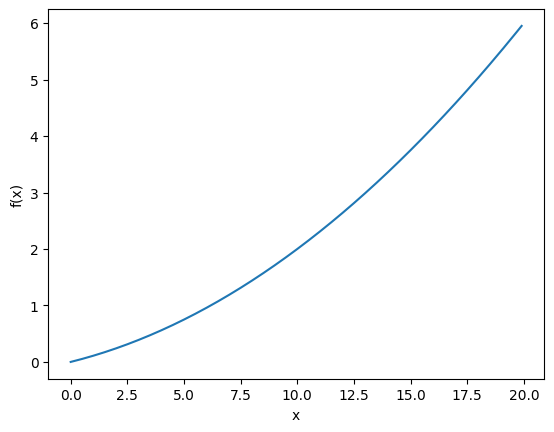

In [24]:
from typing import Callable
import matplotlib.pyplot as plt
import numpy as np

def function_1(x):
    return 0.01 * x**2 + 0.1*x

x = np.arange(0, 20, 0.1)
fig, ax = plt.subplots()
ax.set_xlabel('x')
ax.set_ylabel('f(x)')
ax.plot(x, function_1(x))

In [25]:
def numerical_diff(f: Callable, x: float):
    h = 1e-4
    return (f(x+h) - f(x-h)) / (2*h)

numerical_diff(function_1, 5), numerical_diff(function_1, 10)

(0.1999999999990898, 0.2999999999986347)

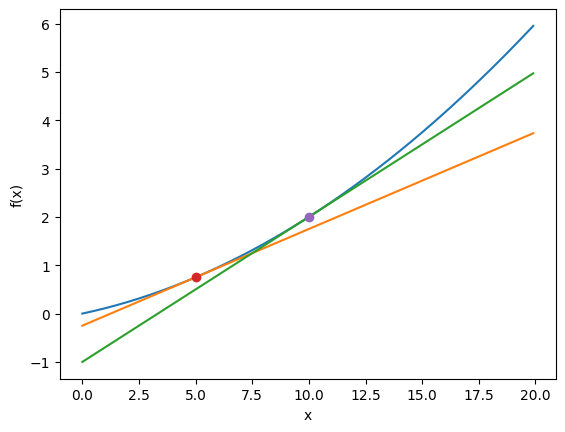

In [26]:
def tangent_line5(x: float):
    # 过(5, 0.75), k = 0.2
    return 0.2 * x - 0.25

def tangent_line10(x: float):
    # 过(10, 2), k = 0.3
    return 0.3 * x - 1

x = np.arange(0, 20, 0.1)
fig, ax = plt.subplots()
ax.set_xlabel('x')
ax.set_ylabel('f(x)')
ax.plot(x, function_1(x), label = 'f(x)')
ax.plot(x, tangent_line5(x), label = "f'(5)")
ax.plot(x, tangent_line10(x), label = "f'(10)")
ax.plot(5, function_1(5), 'o')
ax.plot(10, function_1(10), 'o')


In [ ]:
def tangent_line(f, x):
    d = numerical_diff(f, x)
    y = f(x) - d*x
    return lambda t: d*t + y

## 偏导数

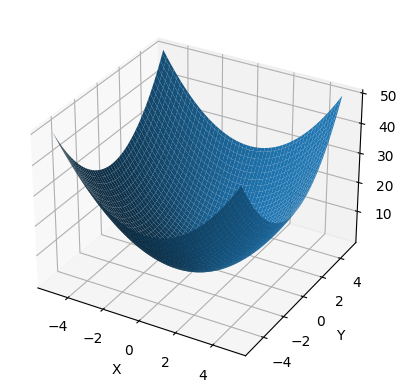

In [120]:
def function_2(x, y):
    return x**2 + y**2

x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)
x, y = np.meshgrid(x, y)
z = function_2(x, y)

fig= plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.plot_surface(x, y, z, label = 'f(x, y)')

In [67]:
# (3, 4)处 function2的偏导
def function2_tmp1(x: float):
    return x ** 2 + 4**2

def function2_tmp2(y: float):
    return 3 ** 2 + y**2
    
numerical_diff(function2_tmp1, 3), numerical_diff(function2_tmp1, 4)

(6.00000000000378, 7.999999999999119)

## 梯度

In [103]:
def numerical_gradient(f: Callable, x: np.array):
    h = 1e-4
    gradient = np.zeros_like(x)
    
    for idx in range(len(x)):
        tmp = x[idx]

        x[idx] = tmp + h
        fxh1 = f(*(x))

        x[idx] = tmp - h
        fxh2 = f(*(x))
        
        gradient[idx] = (fxh1-fxh2)/(2*h)
        x[idx] = tmp
    return gradient

numerical_gradient(function_2, np.array([3.0, 4.0])), numerical_gradient(function_2, np.array([3.0, 0.0]))

(array([6., 8.]), array([6., 0.]))

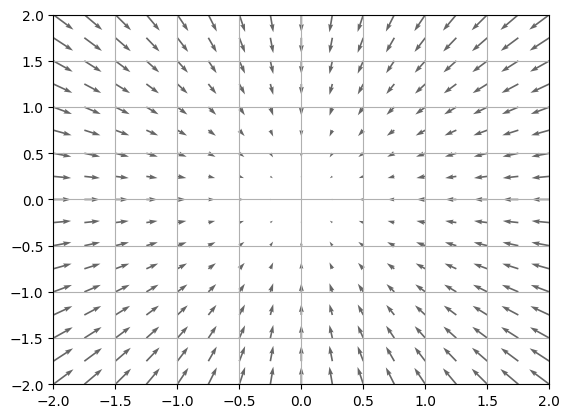

In [109]:
x0 = np.arange(-2, 2.5, 0.25)
x1 = np.arange(-2, 2.5, 0.25)
X, Y = np.meshgrid(x0, x1)

X = X.flatten()
Y = Y.flatten()

grad = numerical_gradient(function_2, np.array([X, Y]) )

plt.figure()
plt.quiver(X, Y, -grad[0], -grad[1],  angles="xy",color="#666666")#,headwidth=10,scale=40,color="#444444")
plt.xlim([-2, 2])
plt.ylim([-2, 2])
plt.grid()

## 梯度下降法

In [121]:
def grad_descend(f: Callable, init_x: np.array, learning_rate: float = 0.01, step_num:int=100):
    x = init_x
    for i in range(step_num):
        x = x - learning_rate * numerical_gradient(f, x)
    return x

grad_descend(function_2, np.array([-3.0, 4.0]), learning_rate=0.1)

array([-6.11110793e-10,  8.14814391e-10])

In [125]:
grad_descend(function_2, np.array([-3.0, 4.0]), learning_rate=10), grad_descend(function_2, np.array([-3.0, 4.0]), learning_rate=1e-10)

(array([-2.58983747e+13, -1.29524862e+12]), array([-2.99999994,  3.99999992]))